<a href="https://colab.research.google.com/github/jelaenas/CESISTA-KJ-DSC1105/blob/main/CESISTA%2C_KJ_LAB_FA2_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 – Data Wrangling and Transformation in R**

In [20]:
library(tidyverse)

data("mpg")

# Confirm that mpg is loaded as a tibble
is_tibble(mpg)

# Display the first six rows of the dataset
head(mpg)

# Use separate() to split the variable trans into transmission type and number of gears
# A log transformation of hwy or cty
# A power transformation (e.g., square root) of displ

mpg_cleaned <- mpg %>%
  separate(
    col = trans,
    into = c("transmission_type", "gears"),
    sep = "\\(",
    remove = TRUE,
    convert = TRUE
  )  %>% mutate(
    gears = str_remove(gears, "\\)"),
    cty = log10(cty),
    displ = sqrt(displ)
  )

head(mpg_cleaned)





[1] TRUE

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


manufacturer,model,displ,year,cyl,transmission_type,gears,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
audi,a4,1.341641,1999,4,auto,l5,f,1.255273,29,p,compact
audi,a4,1.341641,1999,4,manual,m5,f,1.322219,29,p,compact
audi,a4,1.414214,2008,4,manual,m6,f,1.301030,31,p,compact
audi,a4,1.414214,2008,4,auto,av,f,1.322219,30,p,compact
audi,a4,1.673320,1999,6,auto,l5,f,1.204120,26,p,compact
audi,a4,1.673320,1999,6,manual,m5,f,1.255273,26,p,compact


# **Part 2 – Visualization and Interpretation (10 points)**

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


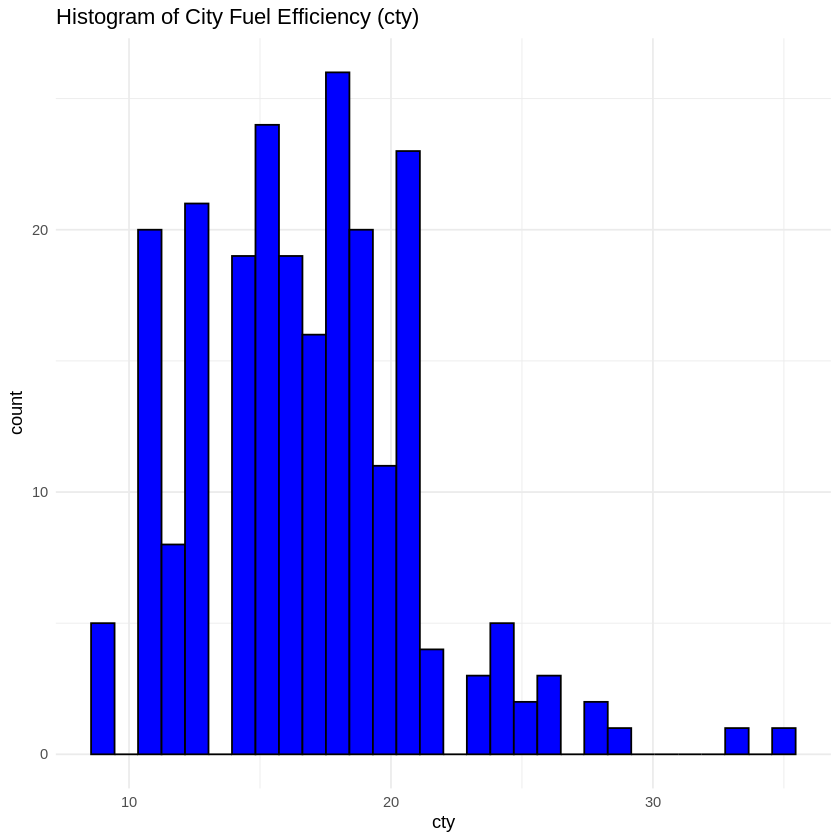

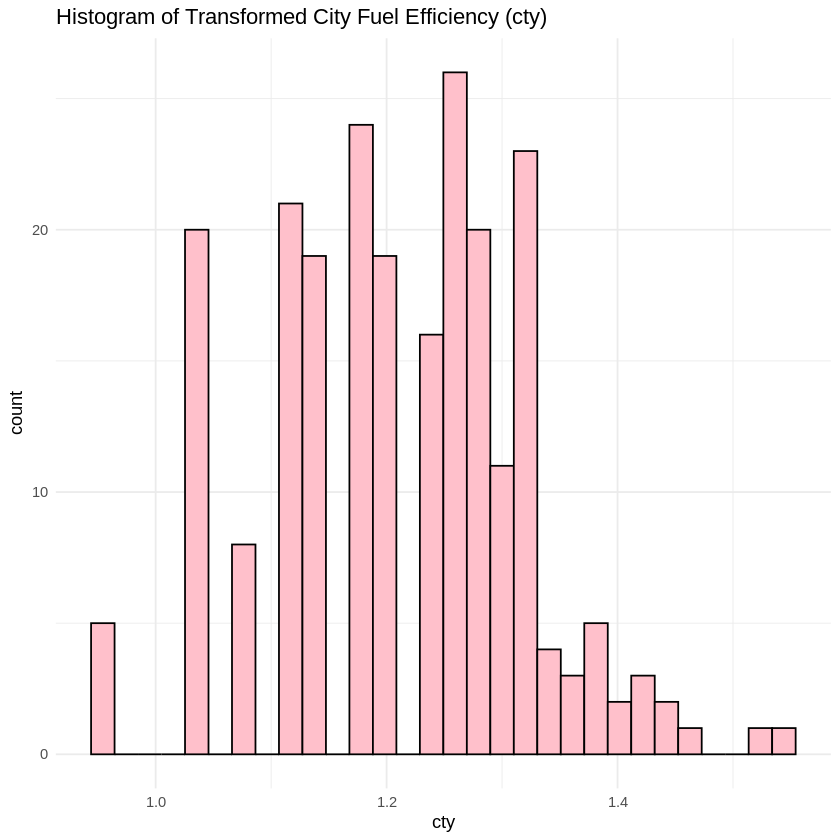

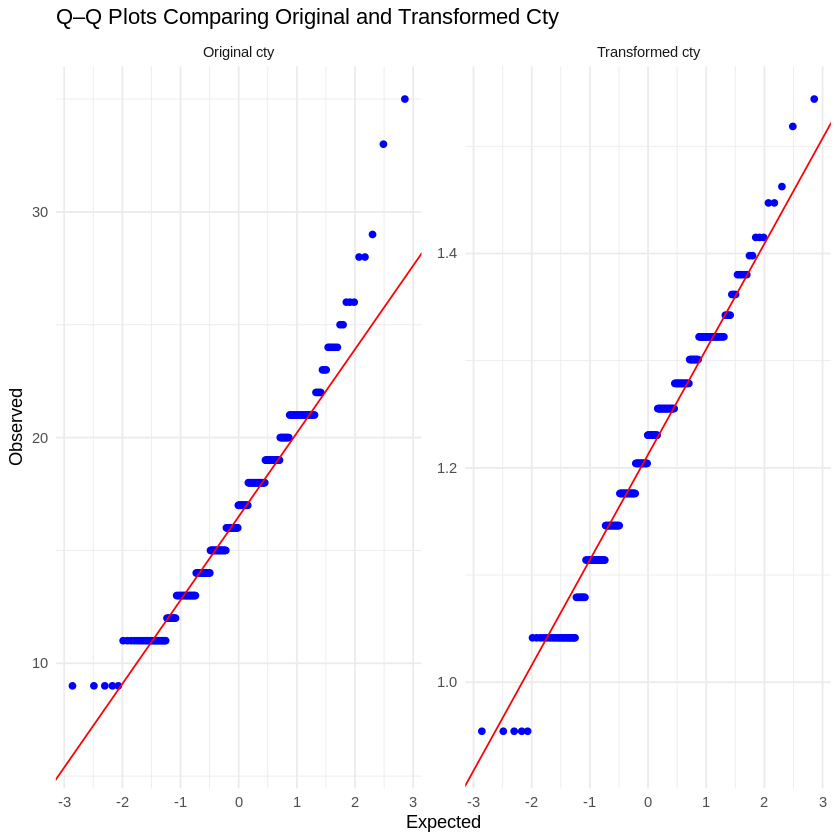

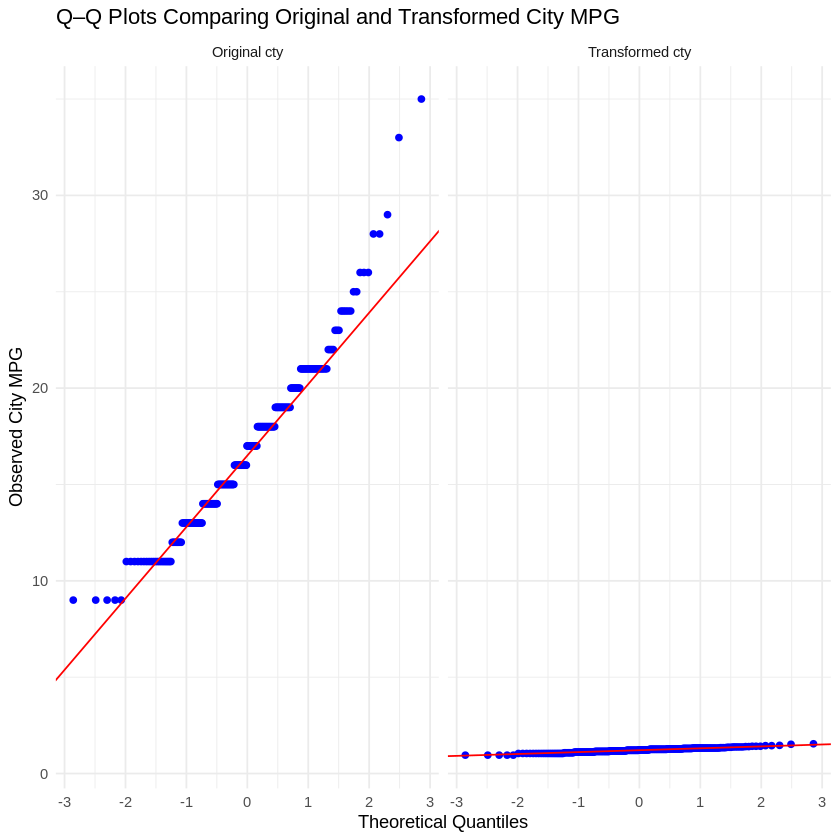

In [31]:
#Histogram of the original fuel efficiency variable (hwy or cty)

ggplot(mpg, aes(x=cty)) +
  geom_histogram(fill = "blue", color = "black")  +
  labs(
    title = "Histogram of City Fuel Efficiency (cty)",
    x = "cty",
    y = "count"
  ) +
  theme_minimal()

# Histogram of the transformed fuel efficiency variable

ggplot(mpg_cleaned, aes(x=cty)) +
  geom_histogram(fill = "pink", color = "black")  +
  labs(
    title = "Histogram of Transformed City Fuel Efficiency (cty)",
    x = "cty",
    y = "count"
  ) +
  theme_minimal()

## Q–Q plot comparing the original and transformed versions of the selected variable

cty_data <- bind_rows(
  mpg %>%
    select(cty) %>%
    mutate(version = "Original cty"),

  mpg_cleaned %>%
    select(cty) %>%
    mutate(version = "Transformed cty")
)

ggplot(cty_data, aes(sample = cty)) +
  stat_qq(color = "blue") +
  stat_qq_line(color = "red") +
  facet_wrap(~ version, scales = "free") +
  labs(
    title = "Q–Q Plots Comparing Original and Transformed Cty",
    x = "Expected",
    y = "Observed"
  ) +
  theme_minimal()

ggplot(cty_data, aes(sample = cty)) +
  stat_qq(color = "blue") +
  stat_qq_line(color = "red") +
  facet_wrap(~ version) +   # same y-axis scale
  labs(
    title = "Q–Q Plots Comparing Original and Transformed City MPG",
    x = "Theoretical Quantiles",
    y = "Observed City MPG"
  ) +
  theme_minimal()


**Interpretation**



Performing a log transformation on the cty variables causes not only the cty variable to become smaller, but also the distance between each variable to become smaller. What happens then is the right skewness of the cty variable is reduced, as outliers are now closer to the mean which makes the distribution appear more balanced. The qq-plots show different symmetry and normality. The qq-plot with the original cty variable shows the points on top are farther  away from the red reference line, indicating that the data is not normal and right skewed. Meanwhile, the qq-plot of the transformed cty, the poings on top are closer to the red reference line, indicating that it is now more symmterical and closer to being distributed normally.

# **Part 3 –  Reflection (5 points)**

I chose the log transformation for the cty variable as this transformation makes values smaller and the distance between them also smaller, resulting in skewness being reduced. For the square root transformation of the displ variable, as it is 3D, using square root on it causes it to become more linear. Overall, those transformations helped with the distribution as shown by the plots, which show that it reduces skewness, and improves symmetry. This transformation can help with future statistical modeling or regression analysis, as it helps with meeting assumptions, such as normality, leading to better analysis.